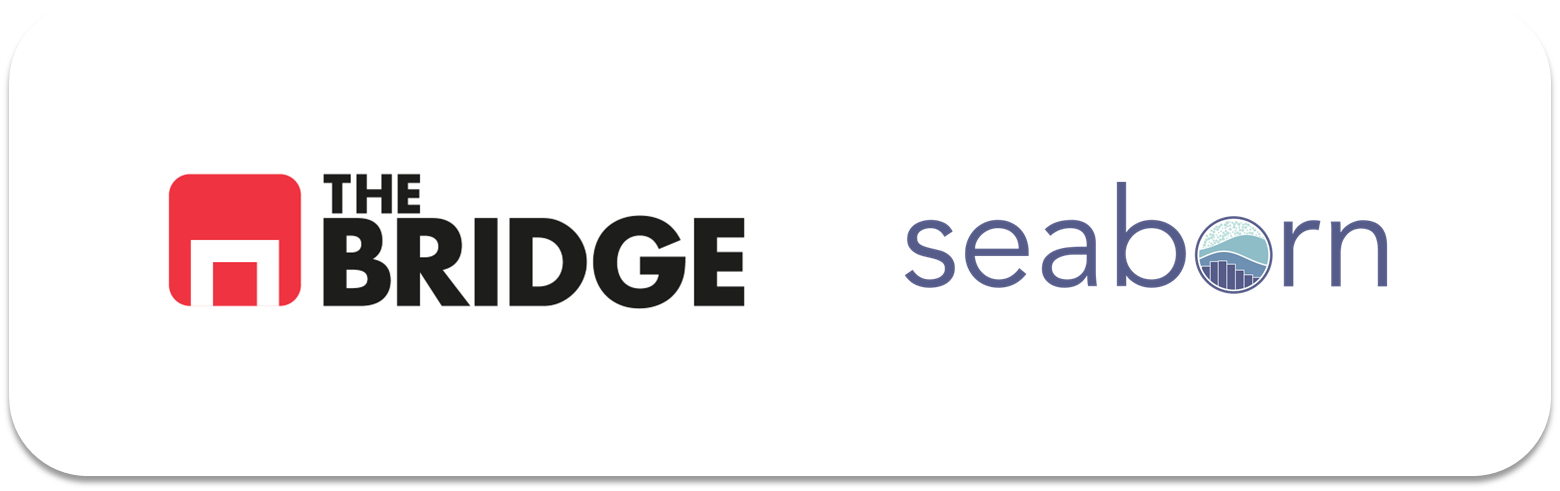

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df_california = pd.read_csv('./data/california_cities.csv')
df_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [3]:
df_california.dropna(inplace= True)
df_california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


In [4]:
df_california.head().sort_values(by= 'population_total', ascending= False)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [5]:
def pintar_diagrama(df, col1, col2, tamanio, escala= 1, categorica= None):

    # escala es un argumento opcional en caso de colocar un str en tamanio, por si acaso el 
    # usuario pone un str en en tamanio pero olvida poner una escala, esta se define como 1
    # por defecto para evitar la excepcion. saldra una grafica fea pero la prefiero al error
    
    tamanio_max, tamanio_min = tamanio, tamanio # si ponemos un tamanio debe coger una referencia max y min, que
                                                # va a ser el mismo numero como max y min, todos iguales
    
    if type(tamanio) == str:   
        df['nuevo'] = df[tamanio] * escala
        tamanio = 'nuevo'
        tamanio_max, tamanio_min = df[tamanio].max(), df[tamanio].min()
    
    
    if categorica.name != None:
        sns.scatterplot(x= col1.name, y= col2.name, hue= categorica.name, data= df, 
                    size= tamanio, sizes= [tamanio_min, tamanio_max], legend= False);
        
    else:
        sns.scatterplot(x= col1.name, y= col2.name, data= df, size= tamanio, 
                                sizes= [tamanio_min, tamanio_max], legend= False);
    
    if 'nuevo' in df.columns.to_list(): # si tamanio era str, borramos la columna que creamos anteriormente para la escala
        df.drop(columns= 'nuevo', inplace= True)

C:\Users\franc\AppData\Local\Temp\ipykernel_4200\2757322113.py:17: UserWarning: The sizes list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x= col1.name, y= col2.name, hue= categorica.name, data= df,


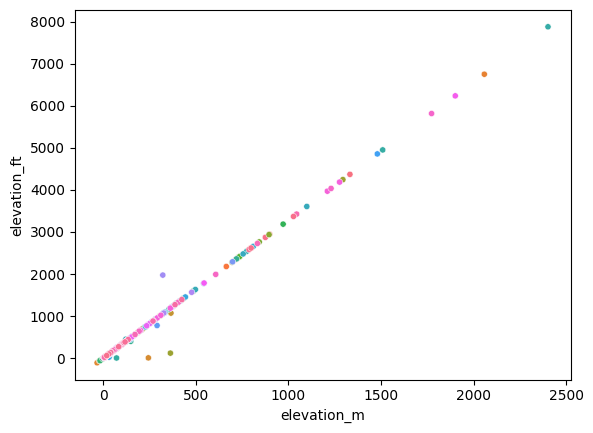

In [6]:
pintar_diagrama(df_california, df_california['elevation_m'], df_california['elevation_ft'],
                 20, 1/1000, df_california['city'])

C:\Users\franc\AppData\Local\Temp\ipykernel_4200\2757322113.py:17: UserWarning: 
The sizes list has fewer values (2) than needed (427) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x= col1.name, y= col2.name, hue= categorica.name, data= df,


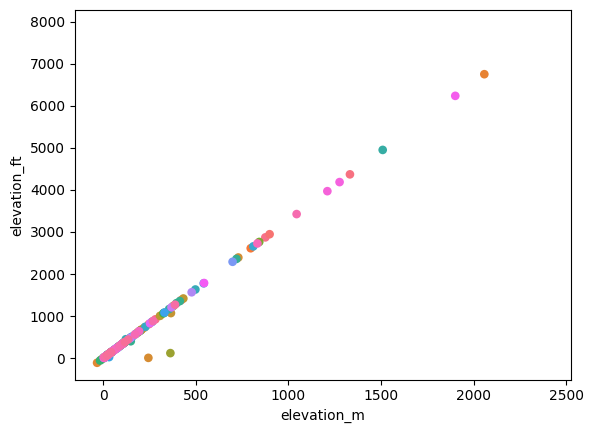

In [7]:
pintar_diagrama(df_california, df_california['elevation_m'], df_california['elevation_ft'],
                 'population_total', 1/100000, df_california['city'])

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

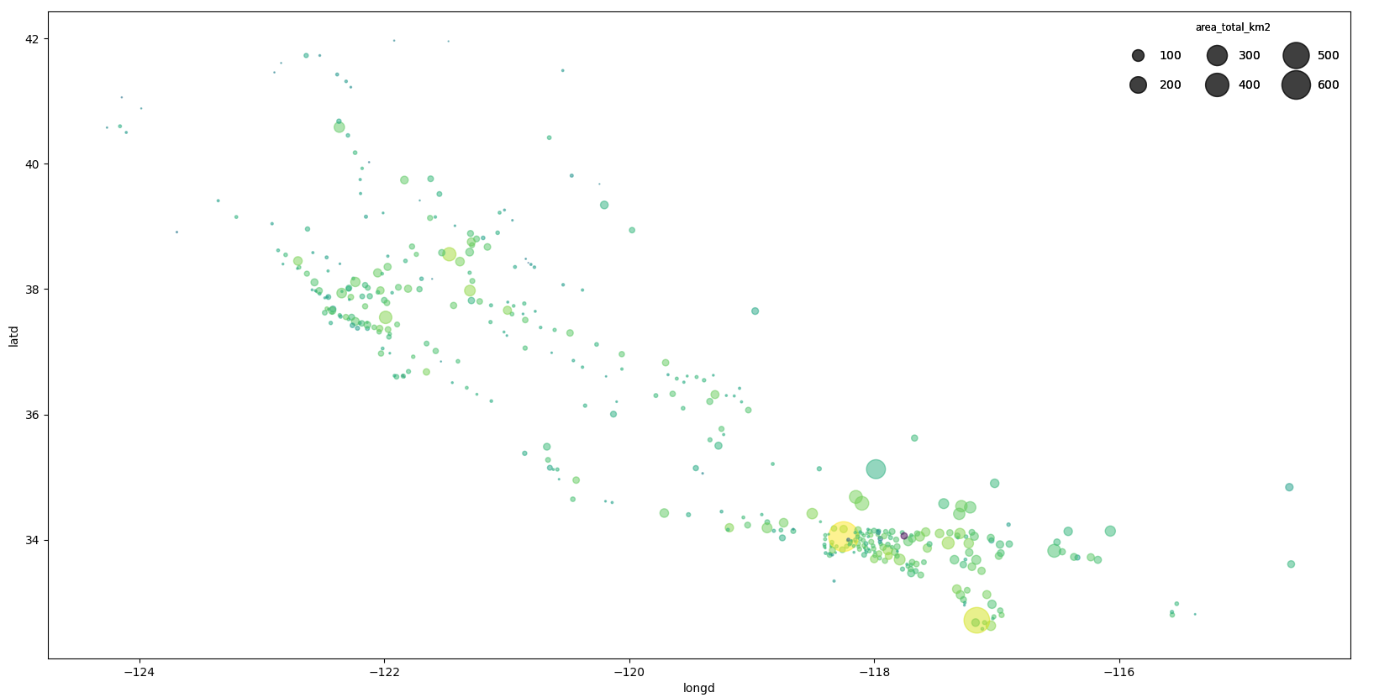

In [8]:
# creamos la nueva columna

df_california['log_poblacion'] = np.log10(df_california['population_total'])
df_california.sort_values(by= 'area_total_km2', ascending= False)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,log_poblacion
239,239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70,6.589314
367,367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68,6.129011
55,55,CaliforniaCity,35.125833,-117.985833,733.0,2405.0,14120,203.631,203.523,0.108,527.401,527.122,0.279,0.05,4.149835
303,303,Palmdale,34.581111,-118.100556,810.0,2657.0,152750,106.216,105.961,0.255,275.099,274.439,0.660,0.24,5.183981
359,359,Sacramento,38.555556,-121.468889,9.0,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19,5.668840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,Isleton,38.161944,-121.609167,3.0,10.0,804,0.492,0.440,0.052,1.272,1.139,0.134,10.50,2.905256
109,109,DelReyOaks,36.593333,-121.835000,25.0,82.0,1624,0.483,0.481,0.002,1.251,1.246,0.005,0.42,3.210586
438,438,Tulelake,41.954167,-121.475833,1230.0,4035.0,1010,0.412,0.410,0.002,1.067,1.061,0.006,0.58,3.004321
242,242,Loyalton,39.676667,-120.243056,1509.0,4951.0,769,0.355,0.355,0.000,0.921,0.921,0.000,0.00,2.885926


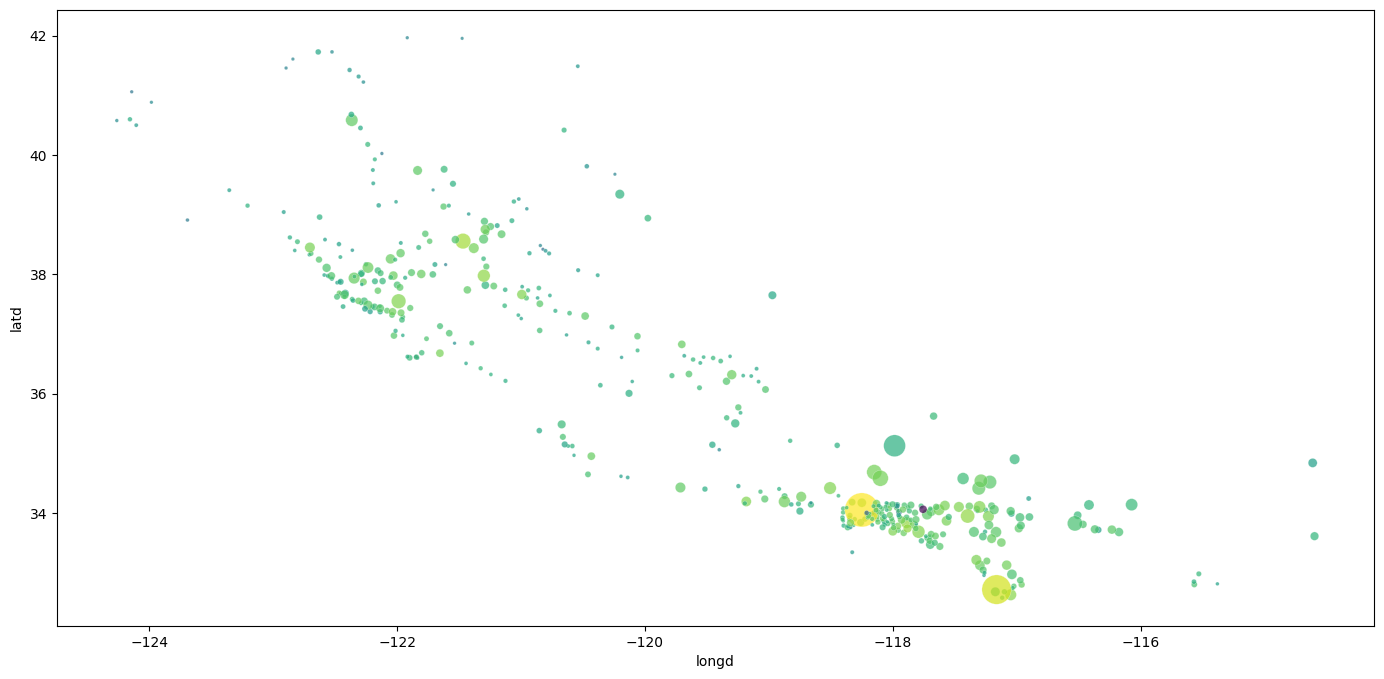

In [9]:
fig = plt.figure(figsize= [17, 8])
df_tamanio_norm = (df_california['area_total_km2'] / df_california['area_total_km2'].max() * 100) # normalizo los tamaños referenciando el tamño maximo para la dimension de los puntos
sns.scatterplot(data= df_california, x= 'longd', y= 'latd', hue= 'log_poblacion', palette= 'viridis', size= df_tamanio_norm, sizes= (6, 600) , legend= False, alpha= 0.7);


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [10]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.drop(columns= 'deck', inplace= True)
df_titanic['age'].fillna(df_titanic['age'].median(), inplace= True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace= True)
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace= True)
df_titanic.info()

# datos limpitos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.4+ KB


C:\Users\franc\AppData\Local\Temp\ipykernel_4200\2861962259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].median(), inplace= True)
C:\Users\franc\AppData\Local\Temp\ipykernel_4200\2861962259.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [11]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


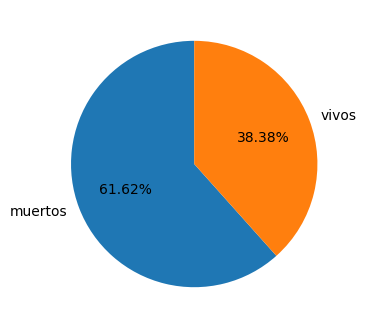

In [12]:
# para mostrar que la mayoria murieron
data = df_titanic["survived"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=['muertos', 'vivos'],
        autopct='%.2f%%', startangle= 90);

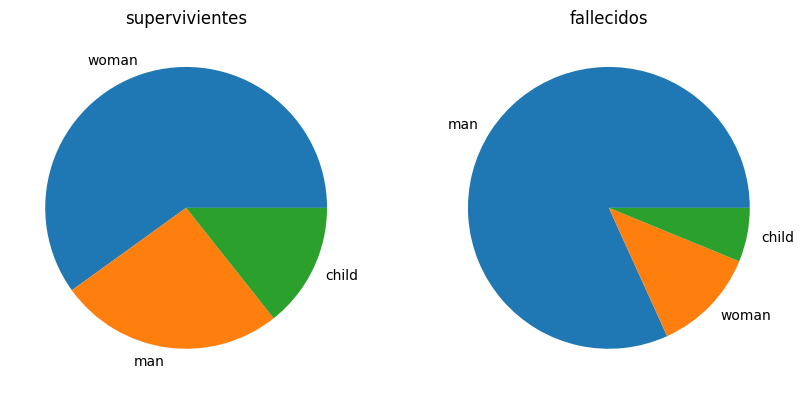

In [13]:
# vamos a estudiar el mujeres y niños primero

df_vivos = df_titanic[df_titanic['survived'] == 1] # creo un df con datos de los que sobrevivieron
df_fallecidos = df_titanic[df_titanic['survived'] == 0] # creo un df con datos de los que murieron

data = df_vivos["who"].value_counts()

fig,ax = plt.subplots(1,2,figsize = (10,10))
sns.set_palette(['blue', 'green', 'red'])

ax[0].pie(data.values,
        labels=data.index,
        )
ax[0].set_title('supervivientes');

data = df_fallecidos["who"].value_counts()

ax[1].pie(data.values,
        labels=data.index,
        )
ax[1].set_title('fallecidos');

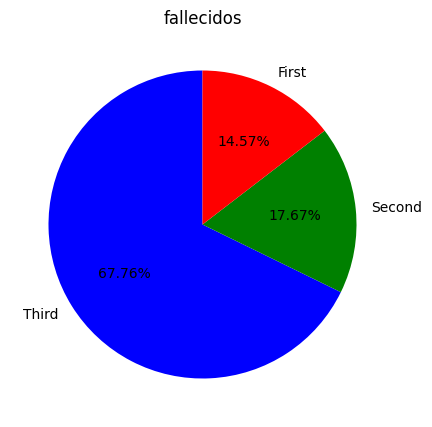

In [14]:
# para mostrar la clase y supervivencia
data = df_fallecidos["class"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (5, 5))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90)
ax.set_title('fallecidos');

class   who  
First   man      0.962500
        woman    0.025000
        child    0.012500
Second  man      0.938144
        woman    0.061856
Third   man      0.755376
        woman    0.155914
        child    0.088710
Name: proportion, dtype: float64


Text(0.5, 1.0, 'fallecidos por who y clase')

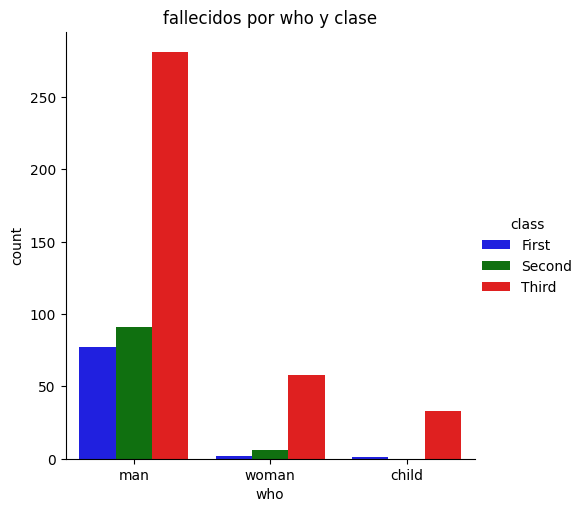

In [24]:
df_class_who = df_fallecidos.groupby(['class'])['who'].value_counts(normalize= True)
print(df_class_who)

sns.catplot(x= 'who', 
           hue= 'class', 
           kind= 'count', 
           orient= 'V',
           data= df_fallecidos.sort_values('class')
           );
plt.title('fallecidos por who y clase')
